<a href="https://colab.research.google.com/github/manoharpavuluri/AI-Art-of-possibilities-with-Huggingface/blob/main/Art_of_possibilities_with_Huggingface.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Import packages**
##### transformers is a package that helps import models with out writing all the code for the model

In [2]:
!pip -q install accelerate -U
!pip -q install transformers[torch]
!pip -q install datasets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 480.6/480.6 kB 7.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 8.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 179.3/179.3 kB 13.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 134.8/134.8 kB 10.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 194.1/194.1 kB 9.9 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
gcsfs 2024.10.0 requires fsspec==2024.10.0, but you have fsspec 2024.9.0 which is incompatible.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from transformers import pipeline

In [4]:
# Textwrp function to display the output in a better format
# This is an optional function, you can ignore it
from IPython.display import HTML, display

def wrap_display():
  display(HTML('''
  <style>
    pre {
        white-space: pre-wrap;
    }
  </style>
  '''))

get_ipython().events.register('pre_run_cell',wrap_display)


# **Sentiment Analysis**

In [5]:
senti_model = pipeline(task="sentiment-analysis")

No model was supplied, defaulted to distilbert/distilbert-base-uncased-finetuned-sst-2-english and revision 714eb0f (https://huggingface.co/distilbert/distilbert-base-uncased-finetuned-sst-2-english).
Using a pipeline without specifying a model name and revision in production is not recommended.
/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


config.json:   0%|          | 0.00/629 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/268M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/48.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/232k [00:00<?, ?B/s]

In [6]:
senti_model("this movie is good, I liked this movie")

[{'label': 'POSITIVE', 'score': 0.999873161315918}]

In [7]:
senti_model1 = pipeline(task="sentiment-analysis",
                model="cardiffnlp/twitter-roberta-base-sentiment-latest")

config.json:   0%|          | 0.00/929 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/501M [00:00<?, ?B/s]

Some weights of the model checkpoint at cardiffnlp/twitter-roberta-base-sentiment-latest were not used when initializing RobertaForSequenceClassification: ['roberta.pooler.dense.bias', 'roberta.pooler.dense.weight']
- This IS expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaForSequenceClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/239 [00:00<?, ?B/s]

In [8]:
senti_model1("this movie is good, I liked this movie")

[{'label': 'positive', 'score': 0.9851754307746887}]

In [9]:
import pandas as pd
user_review_data=pd.read_csv("https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/Amazon_Yelp_Reviews/Review_Data.csv")
user_review_data=user_review_data.sample(50)
user_review_data["Review"]

,Review
1745,There was a warm feeling with the service and ...
982,don't waste your money.
398,"Sounds good reasonably priced and effective, I..."
744,If you like a loud buzzing to override all you...
1154,Some highlights : Great quality nigiri here!
881,Having trouble with volume.
1909,This is my new fav Vegas buffet spot.
453,I even fully charged it before I went to bed a...
358,The phone gets EXTREMELY HOT!
271,Worked perfectly!


In [10]:
user_review_data["Predicted_Sentiment"] = user_review_data["Review"].apply(lambda x: senti_model1(x)[0]["label"])
user_review_data

model.safetensors:   0%|          | 0.00/501M [00:00<?, ?B/s]

,Id,Review,Sentiment,Predicted_Sentiment
1745,1746,There was a warm feeling with the service and ...,1,positive
982,983,don't waste your money.,0,neutral
398,399,"Sounds good reasonably priced and effective, I...",1,positive
744,745,If you like a loud buzzing to override all you...,0,positive
1154,1155,Some highlights : Great quality nigiri here!,1,positive
881,882,Having trouble with volume.,0,negative
1909,1910,This is my new fav Vegas buffet spot.,1,positive
453,454,I even fully charged it before I went to bed a...,0,neutral
358,359,The phone gets EXTREMELY HOT!,0,neutral
271,272,Worked perfectly!,1,positive


## **with GPU**

In [11]:
#  senti_model2 = pipeline(task="text-classification",
#                 model="cardiffnlp/twitter-roberta-base-sentiment-latest",
#                         device = "cuda")

In [12]:
# user_review_data["Predicted_Sentiment"] = user_review_data["Review"].apply(lambda x: senti_model2(x)[0]["label"])
# user_review_data

# **Language Translation**

In [13]:
translator_model = pipeline(task="translation",
                            model="google-t5/t5-small")

config.json:   0%|          | 0.00/1.21k [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/242M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/147 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/2.32k [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/792k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.39M [00:00<?, ?B/s]

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/__init__.py:1140: UserWarning: "translation" task was used, instead of "translation_XX_to_YY", defaulting to "translation_en_to_de"
  warnings.warn(


In [14]:
translator_model("good morning")

[{'translation_text': 'guter Morgen'}]

In [15]:
# to be more specific

translator_model_en_to_fr = pipeline(task="translation_en_to_fr",
                            model="google-t5/t5-small")

In [16]:
translator_model_en_to_fr("Good Morning")

[{'translation_text': 'Bien-jour'}]

# **Q&A based on Document**

In [17]:
qa_model = pipeline(task="question-answering",
                            model="deepset/roberta-base-squad2")

config.json:   0%|          | 0.00/571 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/496M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/79.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/772 [00:00<?, ?B/s]

In [18]:
# If you get any locale related error

import locale
print(locale.getpreferredencoding())

def getpreferredencoding(do_setlocale = True):
    return "UTF-8"
locale.getpreferredencoding = getpreferredencoding


UTF-8


In [19]:
#Importing computer_scientists.txt document from github
!wget https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/computer_scientists/computer_scientists.txt
document=open("computer_scientists.txt").read()


--2024-11-13 21:58:43--  https://raw.githubusercontent.com/venkatareddykonasani/Datasets/master/computer_scientists/computer_scientists.txt
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.108.133, 185.199.109.133, 185.199.110.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.108.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2447 (2.4K) [text/plain]
Saving to: ‘computer_scientists.txt’

computer_scientists 100%[===================>]   2.39K  --.-KB/s    in 0s      

2024-11-13 21:58:44 (23.9 MB/s) - ‘computer_scientists.txt’ saved [2447/2447]



In [20]:
print(document)

Alan Turing:
Pioneering mathematician and computer scientist.
Introduced the Turing Test for AI.

Geoffrey Hinton:
Canadian neural networks and deep learning expert.
Advanced natural language processing (NLP) with backpropagation and convolutional neural networks (CNNs).

Yann LeCun:
French scientist known for his work on CNNs.
Revolutionized AI for image and text processing.

Jurafsky and Martin:
Influential experts in natural language processing.
Authored textbooks and research that have shaped the NLP field.

Ada Lovelace:
Considered the first computer programmer.
Developed algorithms for Charles Babbage's Analytical Engine.

Grace Hopper:
Developed the first compiler for a computer programming language.
Pioneered the development of COBOL, one of the first high-level programming languages.

Andrew Ng:
Co-founder of Google Brain.
Made significant contributions to the development of deep learning and AI education through online courses.

Demis Hassabis:
Co-founder and CEO of DeepMind.

In [21]:
qa_model({"question": "who is the first programmer?",
          "context": document})

/usr/local/lib/python3.10/dist-packages/transformers/pipelines/question_answering.py:391: FutureWarning: Passing a list of SQuAD examples to the pipeline is deprecated and will be removed in v5. Inputs should be passed using the `question` and `context` keyword arguments instead.
  warnings.warn(


{'score': 0.0031902918126434088,
 'start': 518,
 'end': 530,
 'answer': 'Ada Lovelace'}

In [22]:
# #Importing computer_scientists.txt document from github
# !wget https://ftc-resources.firstinspires.org/file/ftc/game/manual
# ftc_document=open("manual").read()

# NER (Name Entity Recognition) Model

In [23]:
ner_model = pipeline(task="ner",
                     model="dslim/bert-base-NER",
                    # device="cuda",
                     aggregation_strategy="simple")
#aggregation_strategy ="Simple" ; simplifies the output and makes it easy to read, else its complex to understand please see below with out it.

config.json:   0%|          | 0.00/829 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/433M [00:00<?, ?B/s]

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


tokenizer_config.json:   0%|          | 0.00/59.0 [00:00<?, ?B/s]

vocab.txt:   0%|          | 0.00/213k [00:00<?, ?B/s]

added_tokens.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

In [24]:
sample_doc="""
Hello,
  I, John Smith, a member of the Tech Innovators team, would like to schedule a meeting with you,
  Mary Johnson, from the Quantum Solutions group, on Tuesday, February 8th, 2024, at 10:00 AM.
  We can meet at your office in San Francisco or, if more convenient, at the Cafe Bella in New York City.
  Please let me know if this date and time work for you.
"""

In [25]:
entities = ner_model(sample_doc)
print(entities)

[{'entity_group': 'PER', 'score': 0.9994373, 'word': 'John Smith', 'start': 13, 'end': 23}, {'entity_group': 'ORG', 'score': 0.9968871, 'word': 'Tech Innovators', 'start': 41, 'end': 56}, {'entity_group': 'PER', 'score': 0.99906284, 'word': 'Mary Johnson', 'start': 108, 'end': 120}, {'entity_group': 'ORG', 'score': 0.9988469, 'word': 'Quantum Solutions', 'start': 131, 'end': 148}, {'entity_group': 'LOC', 'score': 0.9993695, 'word': 'San Francisco', 'start': 233, 'end': 246}, {'entity_group': 'ORG', 'score': 0.6354042, 'word': 'Cafe Bella', 'start': 278, 'end': 288}, {'entity_group': 'LOC', 'score': 0.9994677, 'word': 'New York City', 'start': 292, 'end': 305}]


In [26]:
# Convert the above output into a dataframe and print it with the entity name
NER_result = pd.DataFrame(entities, columns=["word", "entity_group"])

# Print the DataFrame
print(NER_result)

                word entity_group
0         John Smith          PER
1    Tech Innovators          ORG
2       Mary Johnson          PER
3  Quantum Solutions          ORG
4      San Francisco          LOC
5         Cafe Bella          ORG
6      New York City          LOC


In [27]:
ner_model_without_aggregation_strategy = pipeline(task="ner",
                     model="dslim/bert-base-NER"
                    # device="cuda",
                     # aggregation_strategy="simple"
                     )
#aggregation_strategy ="Simple" ; simplifies the output and makes it easy to read, else its complex to understand please see below with out it.

Some weights of the model checkpoint at dslim/bert-base-NER were not used when initializing BertForTokenClassification: ['bert.pooler.dense.bias', 'bert.pooler.dense.weight']
- This IS expected if you are initializing BertForTokenClassification from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing BertForTokenClassification from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).


In [28]:
entities_ner_model_without_aggregation_strategy = ner_model_without_aggregation_strategy(sample_doc)
print(entities_ner_model_without_aggregation_strategy)

[{'entity': 'B-PER', 'score': 0.99938834, 'index': 5, 'word': 'John', 'start': 13, 'end': 17}, {'entity': 'I-PER', 'score': 0.9994862, 'index': 6, 'word': 'Smith', 'start': 18, 'end': 23}, {'entity': 'B-ORG', 'score': 0.9977568, 'index': 12, 'word': 'Tech', 'start': 41, 'end': 45}, {'entity': 'I-ORG', 'score': 0.99737346, 'index': 13, 'word': 'Inn', 'start': 46, 'end': 49}, {'entity': 'I-ORG', 'score': 0.9960075, 'index': 14, 'word': '##ova', 'start': 49, 'end': 52}, {'entity': 'I-ORG', 'score': 0.99641067, 'index': 15, 'word': '##tors', 'start': 52, 'end': 56}, {'entity': 'B-PER', 'score': 0.99925, 'index': 27, 'word': 'Mary', 'start': 108, 'end': 112}, {'entity': 'I-PER', 'score': 0.9988757, 'index': 28, 'word': 'Johnson', 'start': 113, 'end': 120}, {'entity': 'B-ORG', 'score': 0.99912566, 'index': 32, 'word': 'Quantum', 'start': 131, 'end': 138}, {'entity': 'I-ORG', 'score': 0.99856806, 'index': 33, 'word': 'Solutions', 'start': 139, 'end': 148}, {'entity': 'B-LOC', 'score': 0.99933

In [29]:
# Convert the above output into a dataframe and print it with the entity name
ner_model_without_aggregation_strategy_result = pd.DataFrame(entities_ner_model_without_aggregation_strategy, columns=["word", "entity_group"])

# Print the DataFrame
print(ner_model_without_aggregation_strategy_result)

         word  entity_group
0        John           NaN
1       Smith           NaN
2        Tech           NaN
3         Inn           NaN
4       ##ova           NaN
5      ##tors           NaN
6        Mary           NaN
7     Johnson           NaN
8     Quantum           NaN
9   Solutions           NaN
10        San           NaN
11  Francisco           NaN
12       Cafe           NaN
13      Bella           NaN
14        New           NaN
15       York           NaN
16       City           NaN


as you can see it needs more code to extract NER

# Text Summarization Model

In [30]:
summarizer_model = pipeline(task="summarization",
                            model="google/pegasus-xsum",
                           # device="cuda"
                            )

config.json:   0%|          | 0.00/1.39k [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/2.28G [00:00<?, ?B/s]

Some weights of PegasusForConditionalGeneration were not initialized from the model checkpoint at google/pegasus-xsum and are newly initialized: ['model.decoder.embed_positions.weight', 'model.encoder.embed_positions.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


generation_config.json:   0%|          | 0.00/259 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/87.0 [00:00<?, ?B/s]

spiece.model:   0%|          | 0.00/1.91M [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/3.52M [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/65.0 [00:00<?, ?B/s]

In [31]:
Book_essay = """
The 7 Habits of Highly Effective People" is a timeless self-help book by Stephen R. Covey that offers a holistic approach to personal and professional effectiveness. The book is a guide to transforming one's life by adopting seven fundamental habits.
Covey's philosophy centers on the idea that true success is achieved by aligning one's values with principles that govern human effectiveness. The first three habits focus on personal development, emphasizing the importance of taking control of one's life, setting clear goals, and prioritizing tasks based on importance rather than urgency.
The next three habits delve into the concept of interdependence, emphasizing the significance of effective communication, cooperation, and collaboration in achieving mutually beneficial outcomes. Covey argues that fostering strong interpersonal relationships and empathetic listening are key to building trust and synergy.
The seventh habit, "Sharpen the Saw," encourages continuous self-renewal and personal growth through physical, mental, emotional, and spiritual well-being.
Throughout the book, Covey provides practical advice and real-life examples to illustrate each habit's application in various aspects of life, from family and work to leadership and community involvement. "The 7 Habits of Highly Effective People" has had a profound impact on individuals seeking personal and professional growth, offering a framework for achieving lasting success and a sense of fulfillment..
"""

In [32]:
print(summarizer_model(Book_essay, max_length=120, min_length=30))

[{'summary_text': '"The 7 Habits of Highly Effective People" is a timeless self-help book by Stephen R. Covey that offers a holistic approach to personal and professional effectiveness.'}]


# Text Generation Model

In [33]:
text_generator_model = pipeline(task="text-generation",
                                model="gpt2",
                                #device="cuda"
                                )

config.json:   0%|          | 0.00/665 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/548M [00:00<?, ?B/s]

generation_config.json:   0%|          | 0.00/124 [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/26.0 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/1.04M [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

tokenizer.json:   0%|          | 0.00/1.36M [00:00<?, ?B/s]

In [34]:
# Generate text starting with the given prompt
text_result = text_generator_model("The best way to start a presentation is")
print(text_result)

Setting `pad_token_id` to `eos_token_id`:None for open-end generation.


[{'generated_text': 'The best way to start a presentation is to start the presentation with something familiar, like a word or a sentence, and to tell the audience about the topic. The word "consultant" is usually used in the context of a talk, especially'}]


# Hugging Face models without pipeline()


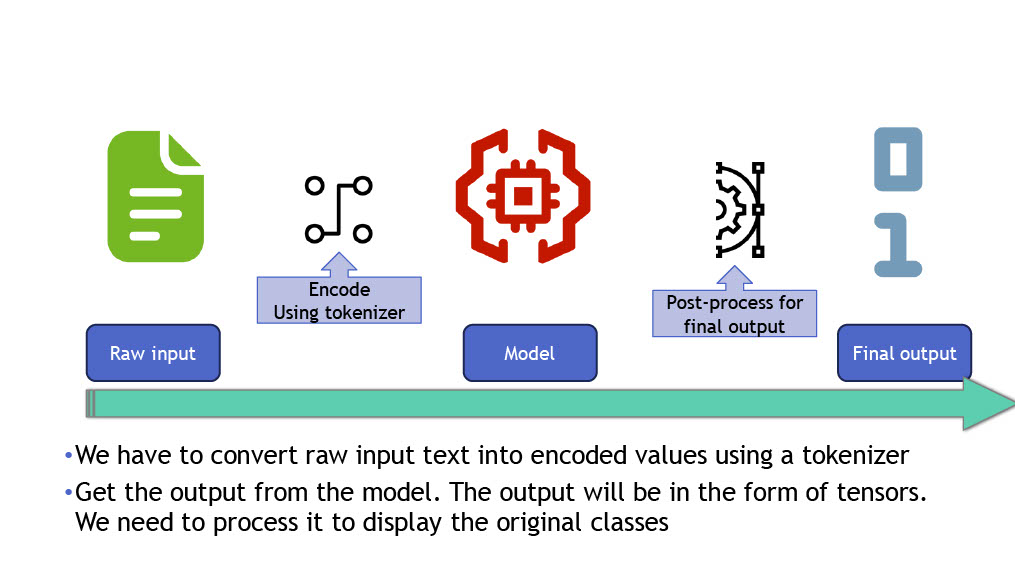

In [35]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

model = AutoModelForSequenceClassification.from_pretrained("cardiffnlp/twitter-roberta-base-sentiment")

config.json:   0%|          | 0.00/747 [00:00<?, ?B/s]

vocab.json:   0%|          | 0.00/899k [00:00<?, ?B/s]

merges.txt:   0%|          | 0.00/456k [00:00<?, ?B/s]

special_tokens_map.json:   0%|          | 0.00/150 [00:00<?, ?B/s]

pytorch_model.bin:   0%|          | 0.00/499M [00:00<?, ?B/s]

In [36]:
import numpy as np
raw_text = "this is a great book"
encoded_input = tokenizer(raw_text,return_tensors='pt')
output = model(**encoded_input)

In [37]:
logits = output.logits.detach().numpy()
y_pred = np.argmax(logits)
y_pred

2

the argmax is, lets say if we have 10 outputs and each has different propbability then ***argmax*** function gets the one with highest propability.

**if you look at the labels for this model - Labels: 0 -> Negative; 1 -> Neutral; 2 -> Positive**

so 2 is positive sentiment analysis

In [38]:
# if I give negative review
raw_text = "this is a bad book"
encoded_input = tokenizer(raw_text,return_tensors='pt')
output = model(**encoded_input)

In [39]:
logits = output.logits.detach().numpy()
y_pred = np.argmax(logits)
y_pred

0

so why would you use the model without the ***pipeline***, it gives opportunity to finetune the model on custom data, and thats what is needed in the companies. when we use different models, on the data, we need to finetune it.